# MOwNiT
## Laboratorium 7 - Całkowanie

## Zadania

In [1]:
using Plots, QuadGK, Polynomials

### Zadanie 1 (1 pkt)
Korzytając z pakietu <a href="https://github.com/JuliaMath/Polynomials.jl">Polynomials</a> zaimplementuj wielomiany Legendre'a zdefiniowane w taki sposób:

$P_{0}(x)=1$

$P_{1}(x)=x$

$P_{k+1}(x)=\frac{2k+1}{k+1} x P_{k}(x)-\frac{k}{k+1}P_{k-1}(x)$

1. narysuj ich wykresy w przedziale (-1,1). 
2. sprawdź (np. za pomocą funkcji <i>roots</i> z pakietu Polynomials), że ich zera  sa odciętymi punktów Gaussa. Test wykonaj dla wielomianow od 2 do 4 stopnia
3. podaj związek tego faktu z podstawowym twierdzeniem kwadratur Gaussa (z wykładu)

In [2]:
function Legendre(n)
    P0 = Polynomial([1])
    P1 = Polynomial([0, 1])

    if n == 0
        return P0
    elseif n == 1
        return P1
    end

    for k in 2:n
        Pk = ((2k - 1) * Polynomial([0, 1]) * P1 - (k - 1) * P0) / k
        P0, P1 = P1, Pk
    end
    return P1
end

Legendre (generic function with 1 method)

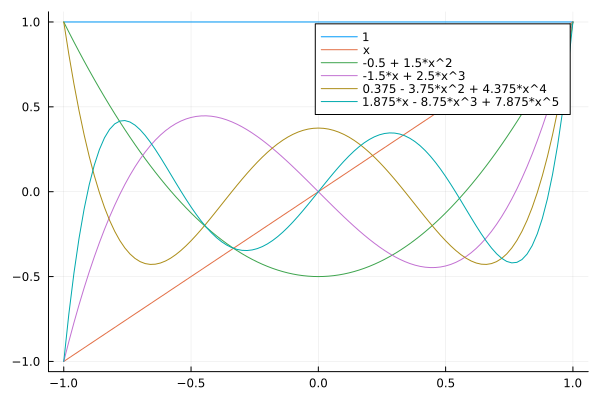

In [3]:
xs = -1:1
plot(Legendre(0), extrema(xs)...)
plot!(Legendre(1), extrema(xs)...)
plot!(Legendre(2), extrema(xs)...)
plot!(Legendre(3), extrema(xs)...)
plot!(Legendre(4), extrema(xs)...)
plot!(Legendre(5), extrema(xs)...)

In [4]:
for i in 2:4
    println("P", i, ":")
    println(roots(Legendre(i)))
    xs, _ = gauss(i)
    println(xs, "\n")
end

P2:
[-0.5773502691896258, 0.5773502691896256]
[-0.5773502691896258, 0.5773502691896258]

P3:
[-0.7745966692414834, 0.7745966692414835, 0.0]
[-0.7745966692414834, 0.0, 0.7745966692414834]

P4:
[-0.8611363115940536, -0.33998104358485653, 0.3399810435848563, 0.8611363115940531]
[-0.8611363115940526, -0.3399810435848563, 0.3399810435848563, 0.8611363115940526]



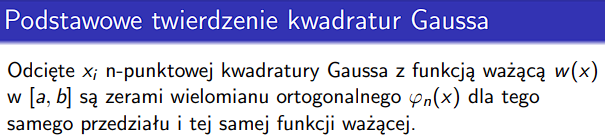

### Zadanie 2 (1 pkt)
Napisz funkcję, która dla podanej liczby punktów Gaussa $k$ oraz funkcji $f$  policzy $\int_{-1}^{1} f dx$
metodą używającą funkcji:
```julia
gauss(k)
```
oraz sumy 
```julia
sum(a .* f.(xp)) 
```
1. przetestuj dla wielomianów coraz większych stopni
2. sprawdz kiedy przestaje być dokładna, 
3. podaj związek z twierdzeniem o  stopniu dokładności kwadratury Gaussa 

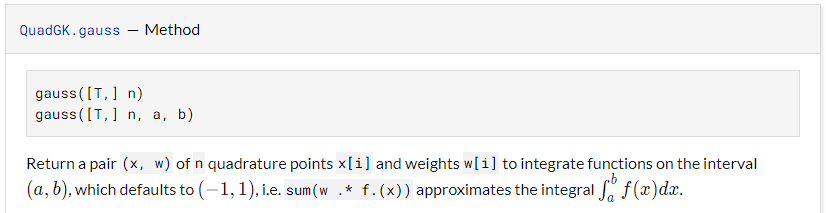

In [5]:
function gaussian(k, f)
    (x, w) = gauss(k)
    return sum(w .* f.(x))
end

gaussian (generic function with 1 method)

In [6]:
expected = [2, 2, 4, 4, 6, 6, 8, 8]

for i in 2:8
    polynomial = Polynomial([j for j in 1:i])
    println(polynomial)
    println("Degree of polynomial: ", i, ", Expected: ", expected[i], ", Result: ", gaussian(3, polynomial))
end

1 + 2*x
Degree of polynomial: 2, Expected: 2, Result: 1.9999999999999996
1 + 2*x + 3*x^2
Degree of polynomial: 3, Expected: 4, Result: 4.0
1 + 2*x + 3*x^2 + 4*x^3
Degree of polynomial: 4, Expected: 4, Result: 4.0
1 + 2*x + 3*x^2 + 4*x^3 + 5*x^4
Degree of polynomial: 5, Expected: 6, Result: 6.0
1 + 2*x + 3*x^2 + 4*x^3 + 5*x^4 + 6*x^5
Degree of polynomial: 6, Expected: 6, Result: 6.000000000000001
1 + 2*x + 3*x^2 + 4*x^3 + 5*x^4 + 6*x^5 + 7*x^6
Degree of polynomial: 7, Expected: 8, Result: 7.680000000000001
1 + 2*x + 3*x^2 + 4*x^3 + 5*x^4 + 6*x^5 + 7*x^6 + 8*x^7
Degree of polynomial: 8, Expected: 8, Result: 7.680000000000001


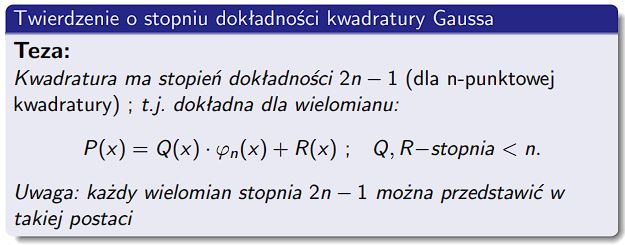

W naszym przypadku n = 3, a więc kwadratura powinna być dokładna aż do wielomianu 5. stopnia, co zgadza się z wynikiem uzyskanym powyżej

### Zadanie 3 (1 pkt)
  
Skorzystaj z rozwiązania zadania 2 do napisania funkcji 
liczącej  całki w dowolnym przedziale $\int_{a}^{b} f(x) dx$ 

dokonując normalizacji  do $\int_{-1}^{1} F(z) dz$ 

podstawiając:

$x=\frac{b+a}{2}+ \frac{b-a}{2} z $ oraz 

$dx =\frac{b-a}{2} dz $

Przetestuj działanie na kilku przykładach i sprawdź z wynikami otrzymanymi analitycznie.


### Zadanie 4 (1 pkt)
Głowną funkcją pakietu QuadGK jest adaptacyjna funkcja <a href="https://juliamath.github.io/QuadGK.jl/stable/#QuadGK.quadgk"> guadgk</a> używająca całkowania  Gauss-Kronroda. Funkcja ta ma możliwość liczenia również całek do nieskończoności.

1. Użyj tej funkcji do policzenia  całki dla przykładowego wielomianu.


2. Policz całkę od minus do plus nieskonczonosci standardowego rozkładu normalnego Gaussa $\frac{1}{\sqrt{2\pi}}exp(\frac{-x^2}{2})$

Dla wielomianu



w przedziale [0; 2] (oczekiwany wynik: 24):

In [7]:
integral, _ = quadgk(x -> 6*x^5 - 20*x^3 + 20*x, 0, 2)

integral

23.999999999999996

Dla standardowego rozkładu normalnego Gaussa

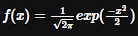

W przedziale od minus do plus nieskończoności (oczekiwany wynik: 1):

In [8]:
integral, _ = quadgk(x -> (1 / sqrt(2 * pi)) * exp(-0.5 * x^2), -Inf, +Inf)

integral

1.0000000000032583

### Zadanie 5 (3 pkt)
Napisz własne funkcje całkujące -  w wybranym przedziale (a,b) - złożonymi metodami prostokątów, trapezów oraz Simpsona. Dla stałego przedziału zwiększaj liczbę użytych punktów (n). Narysuj wykresy funkcji błędu  w stosunku do wyniku otrzymanego analitycznie, 
w zależnosci od $h=\frac{b-a}{n}$:
1. wykładniczej
2. trygonometrycznej (np. sin (x) w przedziale $[0,2\pi]$)


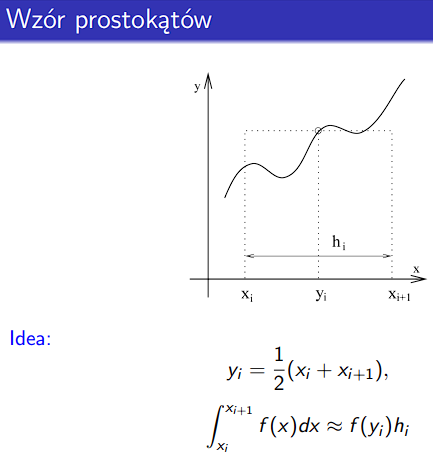

In [9]:
function rectangleMethod(f, a, b, n)
    h = (b - a) / n
    res = 0
    for i in 1:n
        xi = a + (i - 1) * h
        xi1 = a + i * h
        res += f((xi + xi1) / 2) * h
    end
    return res
end


rectangleMethod (generic function with 1 method)

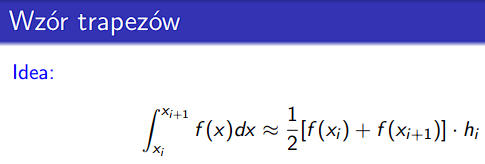

In [10]:
function trapezoidalMethod(f, a, b, n)
    h = (b - a) / n
    res = 0
    for i in 1:n
        xi = a + (i - 1) * h
        xi1 = a + i * h
        res += (f(xi) + f(xi1)) * h / 2
    end
    return res
end

trapezoidalMethod (generic function with 1 method)

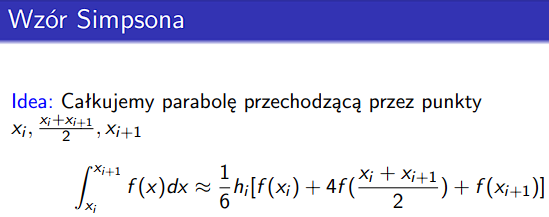

In [11]:
function simpsonMethod(f, a, b, n)
    h = (b - a) / n
    res  = 0
    for i in 1:n
        xi = a + (i - 1) * h
        xi1 = a + i * h
        res += (f(xi) + 4 * f((xi + xi1) / 2) + f(xi1)) * h / 6
    end
    return res
end

simpsonMethod (generic function with 1 method)

In [12]:
f1 = exp
int1 = (0, 1)
ex1 = MathConstants.e - 1

xs = Vector{Float64}()
rErr = Vector{Float64}()
tErr = Vector{Float64}()
sErr = Vector{Float64}()

f2 = cos
int2 = (0, pi / 2)
ex2 = 1

xs2 = Vector{Float64}()
rErr2 = Vector{Float64}()
tErr2 = Vector{Float64}()
sErr2 = Vector{Float64}()

for n in 10:20:1000
    append!(xs, (int1[2]-int1[1]) / n)
    append!(rErr, abs(ex1-rectangleMethod(f1, int1[1], int1[2], n)))
    append!(tErr, abs(ex1-trapezoidalMethod(f1, int1[1], int1[2], n)))
    append!(sErr, abs(ex1-simpsonMethod(f1, int1[1], int1[2], n)))

    append!(xs2, (int2[2]-int2[1]) / n)
    append!(rErr2, abs(ex2-rectangleMethod(f2, int2[1], int2[2], n)))
    append!(tErr2, abs(ex2-trapezoidalMethod(f2, int2[1], int2[2], n)))
    append!(sErr2, abs(ex2-simpsonMethod(f2, int2[1], int2[2], n)))
end

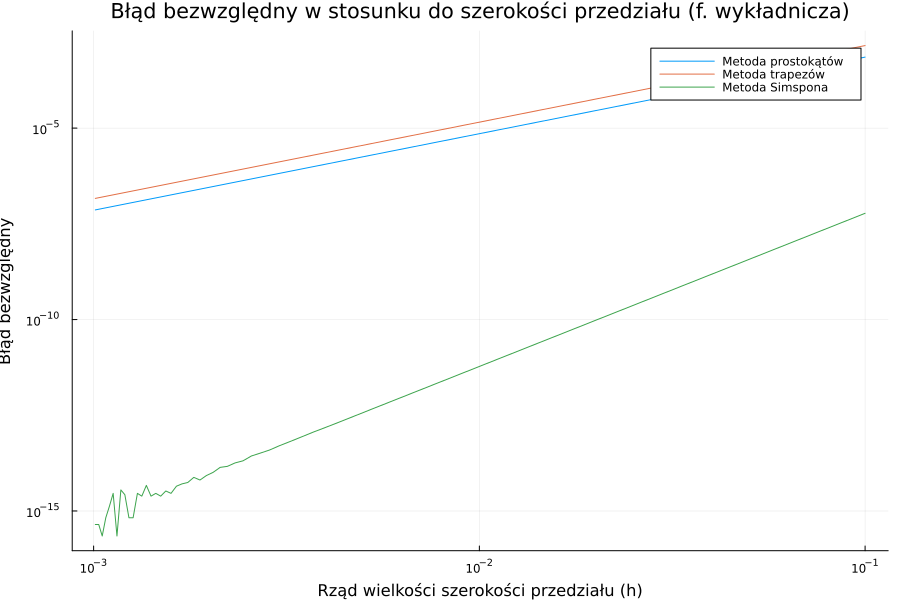

In [13]:
plot(
    xs,
    [rErr, tErr, sErr],
    label=["Metoda prostokątów" "Metoda trapezów" "Metoda Simspona"],
    title="Błąd bezwzględny w stosunku do szerokości przedziału (f. wykładnicza)",
    xlabel="Rząd wielkości szerokości przedziału (h)",
    ylabel="Błąd bezwzględny",
    xaxis=:log,
    yaxis=:log,
    size=(900,600)
)

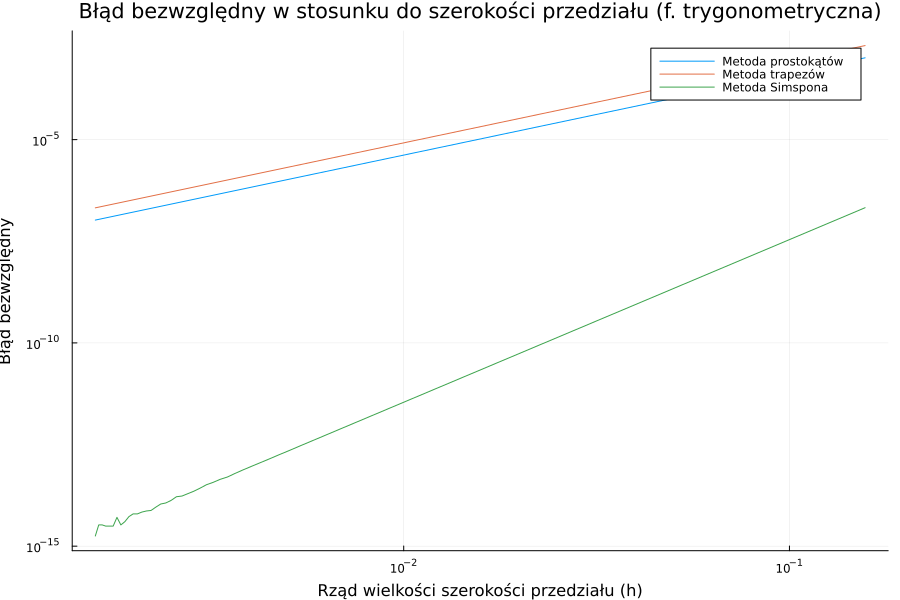

In [14]:
plot(
    xs2,
    [rErr2, tErr2, sErr2],
    label=["Metoda prostokątów" "Metoda trapezów" "Metoda Simspona"],
    title="Błąd bezwzględny w stosunku do szerokości przedziału (f. trygonometryczna)",
    xlabel="Rząd wielkości szerokości przedziału (h)",
    ylabel="Błąd bezwzględny",
    xaxis=:log,
    yaxis=:log,
    size=(900,600)
)